In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import lightkurve as lk

<AxesSubplot: title={'center': 'Target ID: 55525572, Cadence: 151577'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

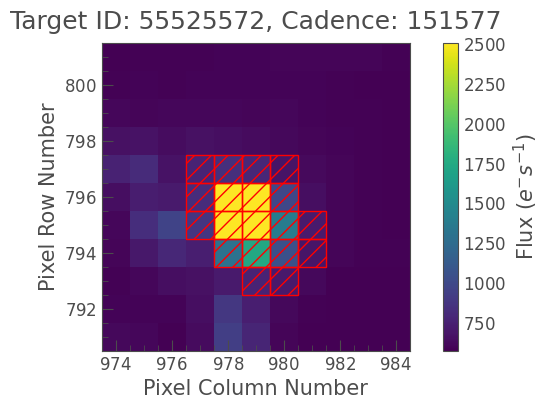

In [3]:
TIC = 'TIC 55525572'

search_result = lk.search_targetpixelfile(TIC, author = "SPOC", sector = 5)
tpf = search_result.download()
tpf.plot(aperture_mask = 'pipeline')

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

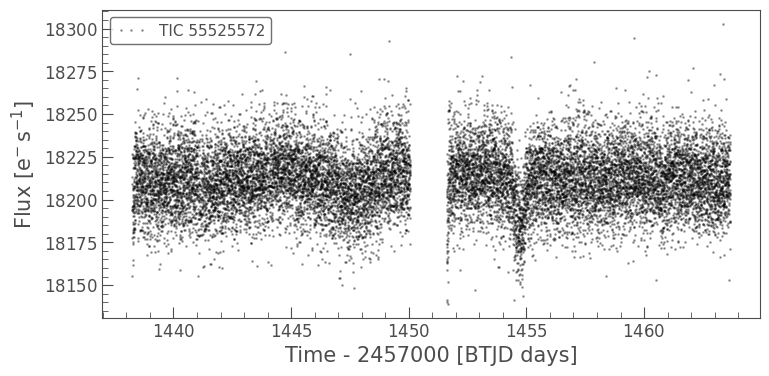

In [4]:
sector_data = lk.search_lightcurve(TIC, author = 'spoc', sector = 5)
lc = sector_data.download()

lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

Retrieve and plot the background flux

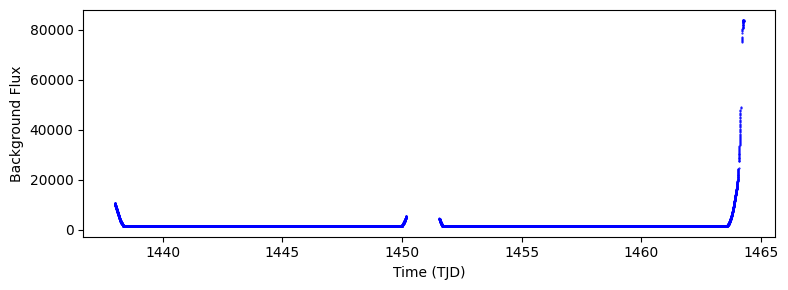

In [8]:
fig, ax = plt.subplots(figsize = (8, 3))

plt.plot(lc.time.value, lc.sap_bkg.value, color = 'blue', lw = 0, marker = '.', ms = 1)
plt.ylabel("Background Flux")
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

Need to find what background flux is doing at the time of the transit event:

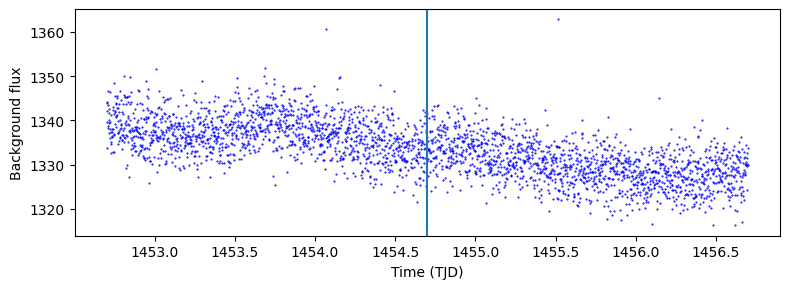

In [11]:
transit_time = 1454.7

transit_mask = (lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2) # Generate a mask -> only see time around the transit event
fig, ax = plt.subplots(figsize = (8, 3))
plt.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1) # Mask the date (time and the flux)
plt.axvline(transit_time)

plt.ylabel("Background flux")
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

^^ Smooth, no spikes in this "light curve"

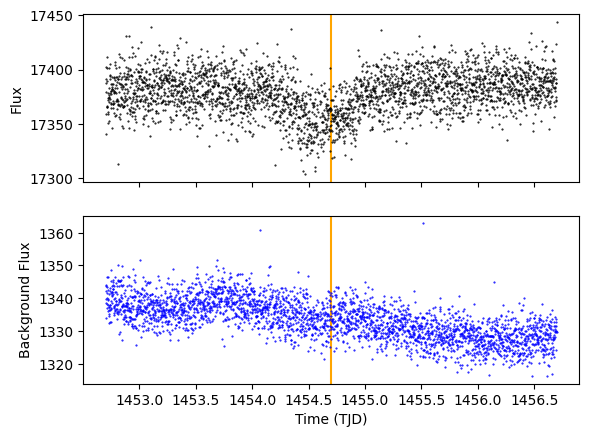

In [12]:
fig, ax = plt.subplots(2, 1, sharex = True) # Compare the lightcurve and background flux in one plot
ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'k', lw = 0, marker = '.', ms = 1)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

ax[0].axvline(transit_time, color = 'orange', zorder = -1) # Plot a line at the time of the transit event
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux") # Shows transit event on 0
ax[1].set_ylabel("Background Flux") # Background flux at time of transit event on plot 1 (2nd plot from top)
ax[1].set_xlabel("Time (TJD)")
plt.show()

Ideal transit candidates will have a smooth background flux at the time of the event (like in this example)

# Background event
Example of a false positive

/home/codespace/.python/current/lib/python3.10/site-packages/lightkurve/search.py:407: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

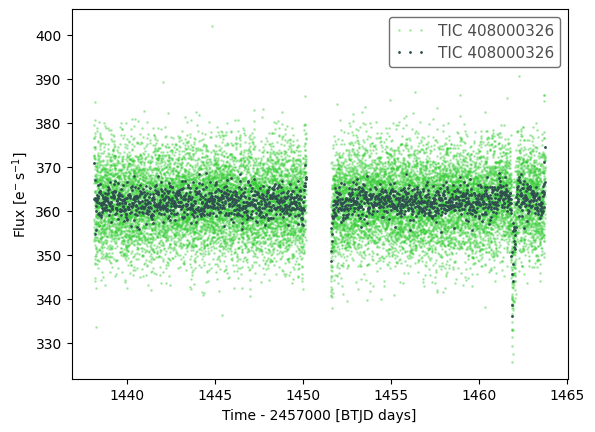

In [15]:
TIC = "TIC 408000326"
sector_data = lk.search_lightcurve(TIC, author = 'SPOC')
lc = sector_data.download()

fig, ax = plt.subplots()

lc.plot(ax = ax, linewidth = 0, marker = '.', color = 'limegreen', alpha = 0.3)
lc.bin(20/24/60).plot(ax = ax, linewidth = 0, marker = '.', ms = 2, color = 'darkslategrey', alpha = 1) # Bin to 20 minutes

Let's take a look at the background flux for this transit/event

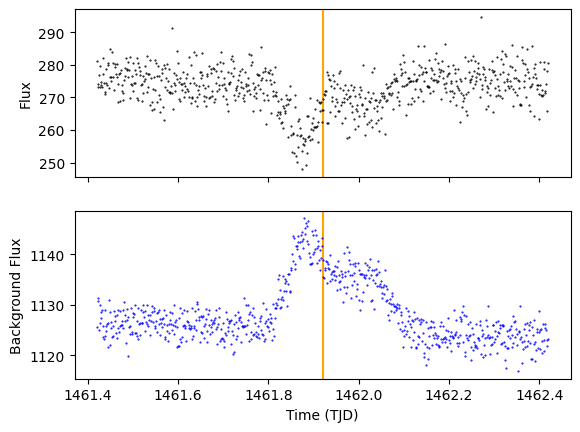

In [16]:
transit_time = 1461.92

transit_mask = (lc.time.value > transit_time - 0.5) & (lc.time.value < transit_time + 0.5)
fig, ax = plt.subplots(2, 1, sharex = True)

ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'k', lw = 0, marker = '.', ms = 1)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

ax[0].axvline(transit_time, color = 'orange', zorder = -1) # Plot a line at the time of the transit event
ax[1].axvline(transit_time, color = 'orange', zorder = -1)

ax[0].set_ylabel("Flux")
ax[1].set_ylabel("Background Flux") 
ax[1].set_xlabel("Time (TJD)")
plt.show()

There is a spike in the background flux -> not a correct signal/transit of a planet